In [1]:
import importlib
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

In [2]:
import multi_loc.covariance as covariance

In [3]:
%matplotlib inline

In [4]:
importlib.reload(covariance)

<module 'multi_loc.covariance' from '/Users/harty/Documents/multi_loc/multi_loc/covariance.py'>

In [5]:
def imshow(X, title=None):
    plt.figure()
    im = plt.imshow(X)
    plt.colorbar(im)
    plt.title(title)

In [6]:
dimension = 100
rho0 = 20
rho = np.arange(dimension, dtype=float)
rho = np.minimum(rho, (dimension - rho) % dimension)

In [7]:
eig_val, eig_vec, P = covariance.generate_circulant(
    rho, rho0, covariance.correlation_exp,
    return_Corr = True)
P = P.real

Text(0.5,1,'Eigenvalues (imaginary)')

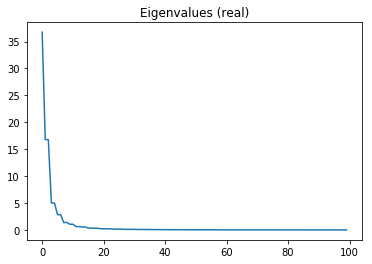

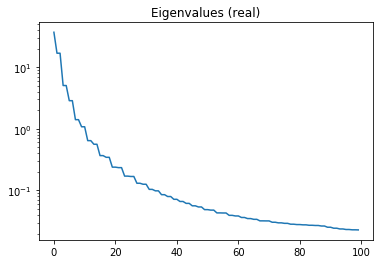

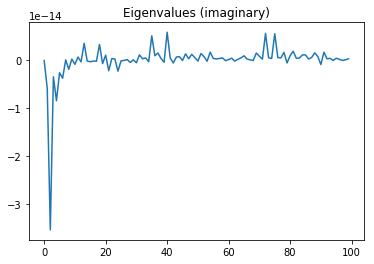

In [8]:
plt.figure()
plt.plot(eig_val.real)
plt.title('Eigenvalues (real)')

plt.figure()
plt.semilogy(eig_val.real)
# plt.ylim([0, 1])
plt.title('Eigenvalues (real)')

plt.figure()
plt.plot(eig_val.imag)
plt.title('Eigenvalues (imaginary)')

Log10(condition):  3.204300912305241


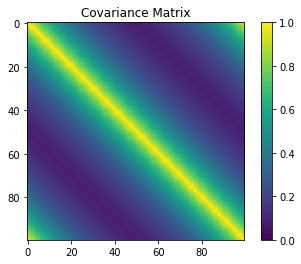

In [9]:
plt.figure()
im = plt.imshow(P, vmin=0, vmax=1)
plt.colorbar(im)
plt.title('Covariance Matrix')
print('Log10(condition): ',
      np.log10(np.linalg.cond(P)))

Text(0.5,1,'Error in Reconstructed P')

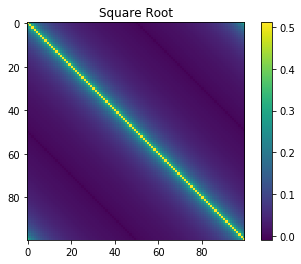

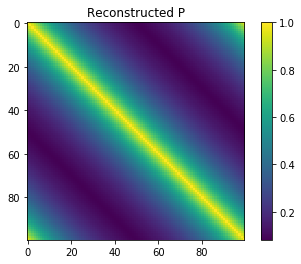

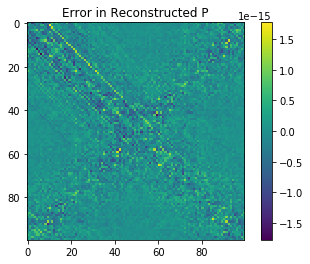

In [10]:
P_sqrt = covariance.matrix_sqrt(eig_val=eig_val,
                                eig_vec=eig_vec)
P_sqrt = P_sqrt.real

plt.figure()
im = plt.imshow(P_sqrt)
plt.colorbar(im)
plt.title('Square Root')

plt.figure()
im = plt.imshow(P_sqrt @ P_sqrt)
plt.colorbar(im)
plt.title('Reconstructed P')

plt.figure()
im = plt.imshow(P - P_sqrt @ P_sqrt)
plt.colorbar(im)
plt.title('Error in Reconstructed P')

Text(0.5,1,'Error in Reconstructed inverse')

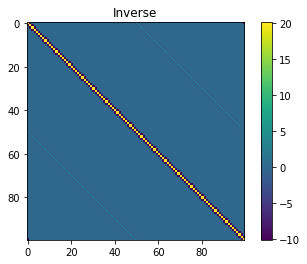

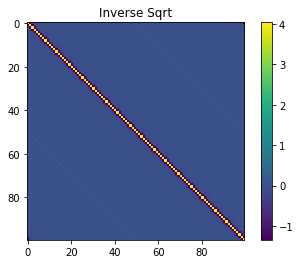

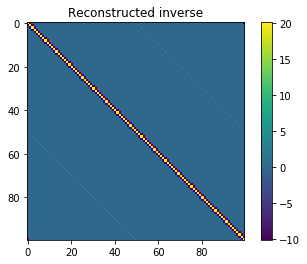

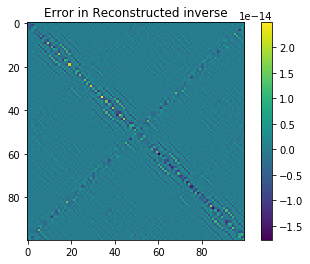

In [11]:
P_inv = covariance.matrix_inv(eig_val=eig_val,
                              eig_vec=eig_vec)
P_inv = P_inv.real

P_inv_sqrt = covariance.matrix_sqrt_inv(
    eig_val=eig_val,
    eig_vec=eig_vec)

P_inv_sqrt = P_inv_sqrt.real

plt.figure()
im = plt.imshow(P_inv)
plt.colorbar(im)
plt.title('Inverse')

plt.figure()
im = plt.imshow(P_inv_sqrt)
plt.colorbar(im)
plt.title('Inverse Sqrt')

plt.figure()
im = plt.imshow(P_inv_sqrt @ P_inv_sqrt)
plt.colorbar(im)
plt.title('Reconstructed inverse')

plt.figure()
im = plt.imshow(P_inv - P_inv_sqrt @ P_inv_sqrt)
plt.colorbar(im)
plt.title('Error in Reconstructed inverse')

In [60]:
ens_size = int(40)
mu = np.zeros(dimension)
X_ens = covariance.generate_ensemble(
    ens_size, mu, P_sqrt)

H = np.eye(dimension)[::2]
R = np.eye(H.shape[0])
R_inv = R.copy()
R_sqrt = R.copy()
R_inv_sqrt = R.copy()
obs_size = int(1e4)

ground_truth = covariance.generate_ensemble(
    1, mu, P_sqrt)
# y_ens = y_ens.ravel()
Y_ens = H @ ground_truth + R_sqrt @ np.random.randn(H.shape[0], obs_size)

In [61]:
mu_sample = X_ens.mean(axis=1)
P_sample = np.cov(X_ens)

Text(0.5,1,'Sample mean')

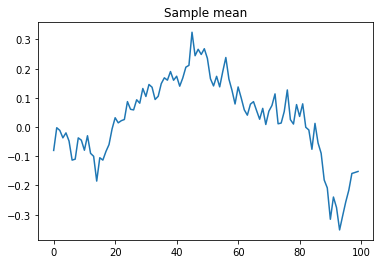

In [62]:
plt.figure()
plt.plot(mu_sample)
plt.title('Sample mean')

Text(0.5,1,'Error of sample')

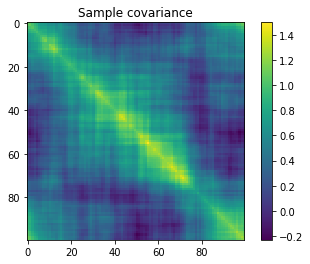

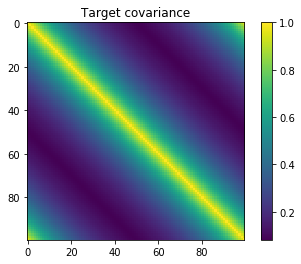

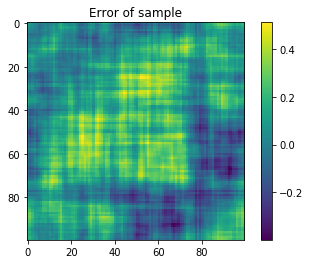

In [63]:
plt.figure()
im = plt.imshow(P_sample)
plt.colorbar(im)
plt.title('Sample covariance')

plt.figure()
im = plt.imshow(P)
plt.colorbar(im)
plt.title('Target covariance')

plt.figure()
im = plt.imshow(P_sample - P)
plt.colorbar(im)
plt.title('Error of sample')

In [64]:
X_ens_til = (
    P_inv_sqrt @ X_ens)

Y_ens_til = (
    R_inv_sqrt @ Y_ens)

In [65]:
mu_til = X_ens_til.mean(axis=1)
P_til = np.cov(X_ens_til)

Text(0.5,1,'Sample mean')

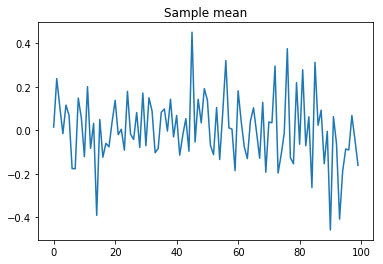

In [66]:
plt.figure()
plt.plot(mu_til)
plt.title('Sample mean')

Text(0.5,1,'Error of sample')

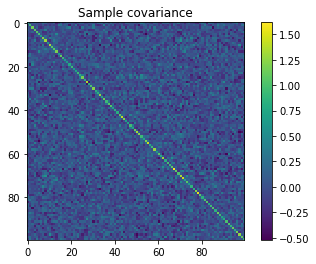

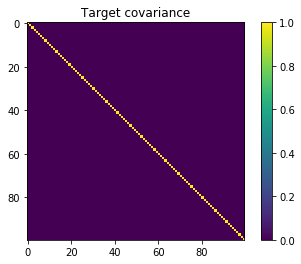

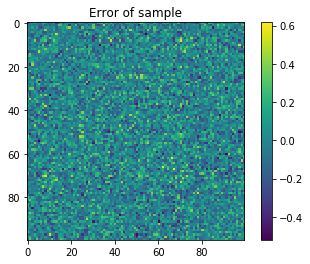

In [67]:
plt.figure()
im = plt.imshow(P_til)
plt.colorbar(im)
plt.title('Sample covariance')

plt.figure()
im = plt.imshow(np.eye(P_til.shape[0]))
plt.colorbar(im)
plt.title('Target covariance')

plt.figure()
im = plt.imshow(P_til - np.eye(P_til.shape[0]))
plt.colorbar(im)
plt.title('Error of sample')

In [68]:
# Localization using simmilar techniques from 
# covariance localization.

# loc_rho = np.arange(rho.size)
# loc_mat = covariance.make_correlation_matrix(
#     loc_rho, 1, covariance.correlation_sqd_exp)
# plt.figure()
# im = plt.imshow(loc_mat)
# plt.colorbar(im)
# plt.title('Localization matrix')
# P_til_loc = loc_mat * P_til

In [69]:
# Instead make the new localized matrix a weighted sum between the
# sample covariance and what we thing the covariance aught to be.
# I beleive this is a technique used in 3d-var

alpha = .5
P_til_loc = (1 - alpha) * P_til + alpha * np.eye(P_til.shape[1])

In [70]:
P_sample_loc = P_sqrt @ P_til_loc @ P_sqrt

Text(0.5,1,'Target covariance')

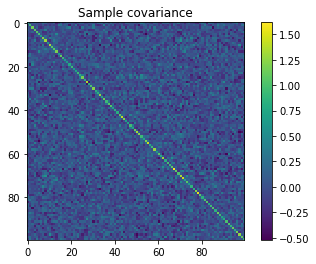

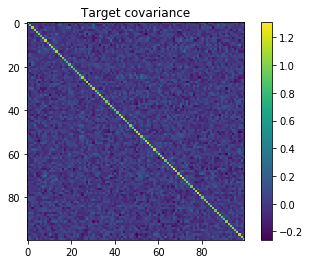

In [71]:
plt.figure()
im = plt.imshow(P_til)
plt.colorbar(im)
plt.title('Sample covariance')

plt.figure()
im = plt.imshow(P_til_loc)
plt.colorbar(im)
plt.title('Target covariance')

Text(0.5,1,'Error of sample')

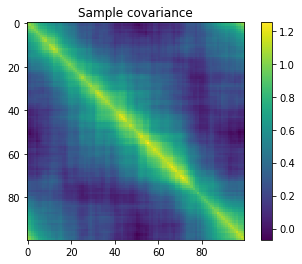

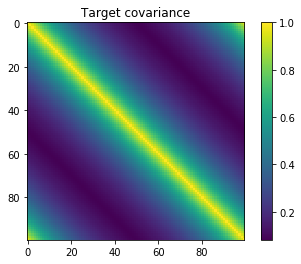

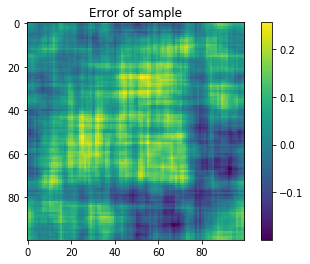

In [72]:
plt.figure()
im = plt.imshow(P_sample_loc)
plt.colorbar(im)
plt.title('Sample covariance')

plt.figure()
im = plt.imshow(P)
plt.colorbar(im)
plt.title('Target covariance')

plt.figure()
im = plt.imshow(P_sample_loc - P)
plt.colorbar(im)
plt.title('Error of sample')

In [73]:
U, S, VT = sp.linalg.svd(R_inv_sqrt @ H @ P_sqrt)
m = U.shape[0]
n = VT.shape[0]
S = np.diag(S)
S = np.concatenate([S, np.zeros([m, n-m])], axis=1)

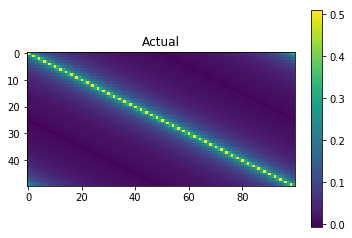

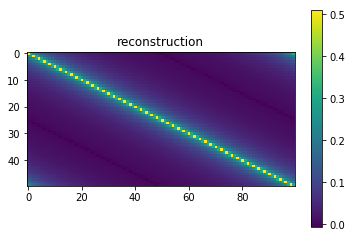

In [74]:
imshow(R_inv_sqrt @ H @ P_sqrt, 'Actual')
imshow(U @ S @ VT, 'reconstruction')

In [75]:
X_ens_p = VT @ X_ens_til
Y_ens_p = U.T @ Y_ens_til

Text(0.5,1,'In real space')

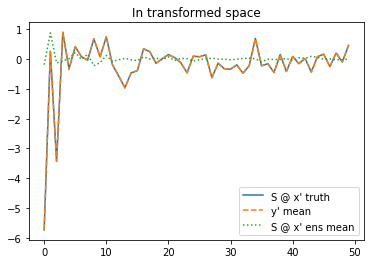

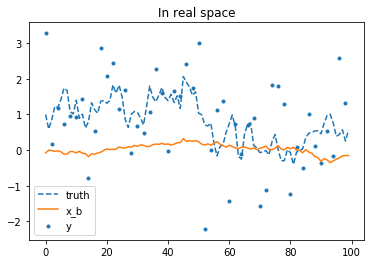

In [76]:
plt.figure()
plt.plot(S @ VT @ P_inv_sqrt @ ground_truth, '-')
plt.plot(Y_ens_p.mean(axis=1), '--')
plt.plot(S @ X_ens_p.mean(axis=1)[:, None], ':')
plt.legend(['S @ x\' truth', 'y\' mean', 'S @ x\' ens mean'])
plt.title('In transformed space')

plt.figure()
plt.plot(ground_truth, '--')
plt.plot(P_sqrt @ VT.T @ X_ens_p.mean(axis=1), '-')
plt.scatter(np.arange(dimension)[::2], Y_ens[:, 0], marker='.')
plt.legend(['truth', 'x_b', 'y'])
plt.title('In real space')

In [77]:
# one update
y_size = H.shape[0]
mu_p = X_ens_p.mean(axis=1)[:, None]
Y_obs = Y_ens_p[:, 0][:, None] + R_sqrt @ np.random.randn(H.shape[0], ens_size)
K = (S.diagonal()/(1 + S.diagonal()**2))[:, None]
X_ens_p_hat = X_ens_p.copy()
X_ens_p_hat[:y_size] = mu_p[:y_size] + K * (Y_obs - S @ mu_p)

Text(0.5,1,'In real space')

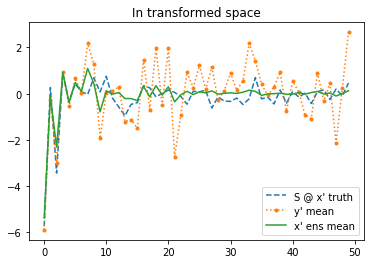

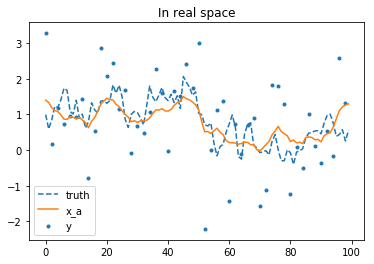

In [78]:
plt.figure()
plt.plot(S @ VT @ P_inv_sqrt @ ground_truth, '--')
plt.plot(Y_ens_p[:, 0], ':', marker='.')
plt.plot(S @ X_ens_p_hat.mean(axis=1), '-')
plt.legend(['S @ x\' truth', 'y\' mean', 'x\' ens mean'])
plt.title('In transformed space')


plt.figure()
plt.plot(ground_truth, '--')
plt.plot(P_sqrt @ VT.T @ X_ens_p_hat.mean(axis=1), '-')
plt.scatter(np.arange(dimension)[::2], Y_ens[:, 0], marker='.')
plt.legend(['truth', 'x_a', 'y'])
plt.title('In real space')

In [109]:
eig_val, eig_vec, P = covariance.generate_circulant(
    rho, rho0, covariance.correlation_exp,
    return_Corr = True)
P = P.real

P_sqrt = covariance.matrix_sqrt(eig_val=eig_val,
                                eig_vec=eig_vec)
P_sqrt = P_sqrt.real

# P_inv = covariance.matrix_inv(eig_val=eig_val,
#                               eig_vec=eig_vec)
# P_inv = P_inv.real

P_inv_sqrt = covariance.matrix_sqrt_inv(
    eig_val=eig_val,
    eig_vec=eig_vec)

P_inv_sqrt = P_inv_sqrt.real
U, S, VT = sp.linalg.svd(R_inv_sqrt @ H @ P_sqrt)
m = U.shape[0]
n = VT.shape[0]
S = np.diag(S)
S = np.concatenate([S, np.zeros([m, n-m])], axis=1)

In [120]:
def stuff(P_p, P_sqrt, VT):
    P = P_sqrt @ VT.conj().T @ P_p @ VT @ P_sqrt
    P = P.real
    imshow(P, 'Analysis Covariance')
#     eig_val, eig_vec = sp.linalg.eigh(P)

#     P_sqrt = covariance.matrix_sqrt(eig_val=eig_val,
#                                     eig_vec=eig_vec)
#     P_sqrt = P_sqrt.real

#     P_inv_sqrt = covariance.matrix_sqrt_inv(
#         eig_val=eig_val,
#         eig_vec=eig_vec)

#     P_inv_sqrt = P_inv_sqrt.real
#     U, S, VT = sp.linalg.svd(R_inv_sqrt @ H @ P_sqrt)
#     S = np.diag(S)
#     S = np.concatenate([S, np.zeros([y_size, dimension - y_size])], axis=1)
    
#     return P_sqrt, P_inv_sqrt, U, S, VT

/Users/harty/anaconda3/envs/multiloc/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Text(0,0.5,'RMSE')

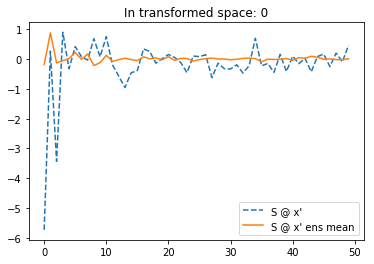

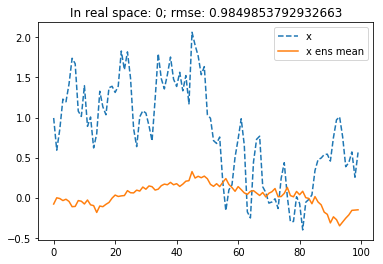

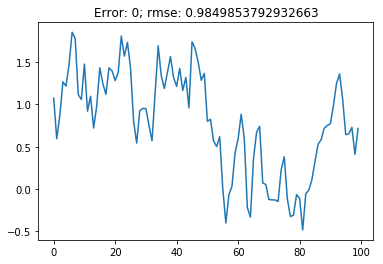

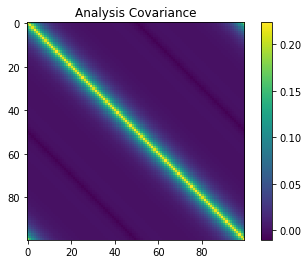

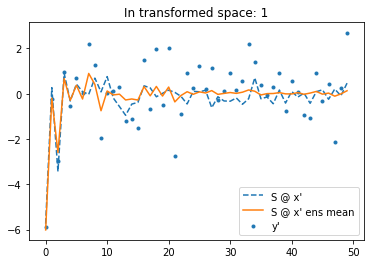

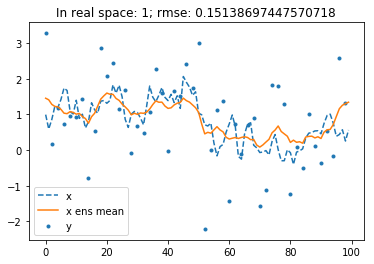

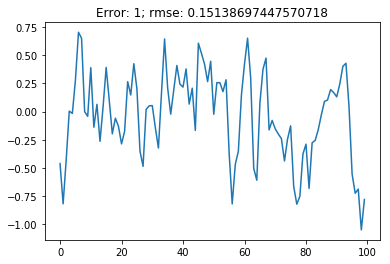

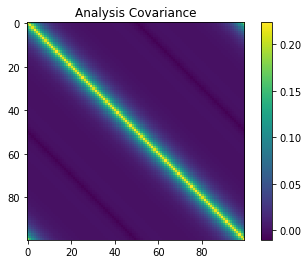

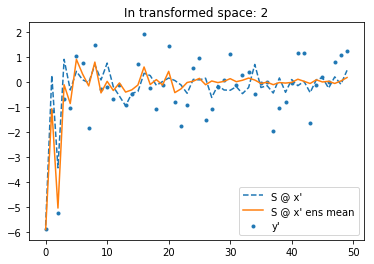

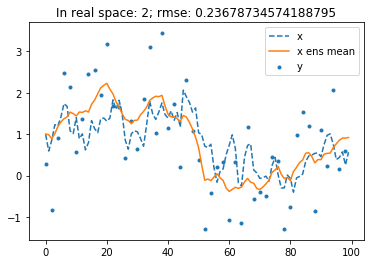

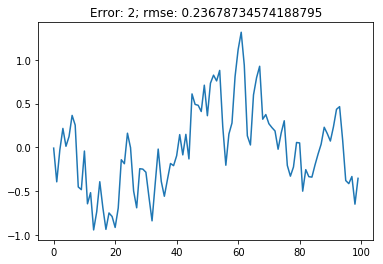

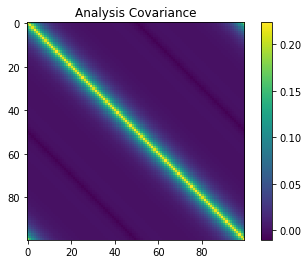

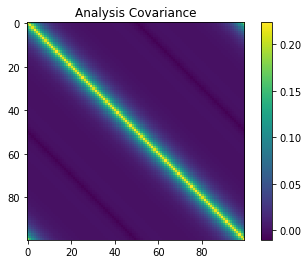

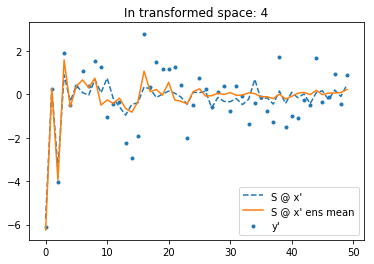

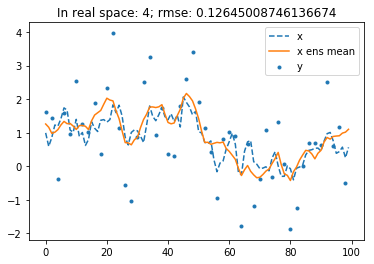

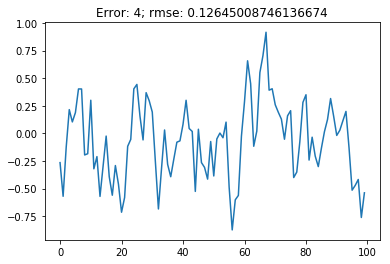

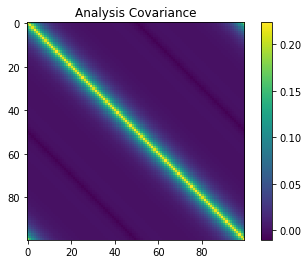

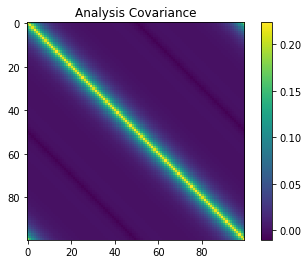

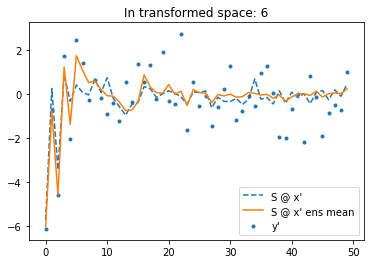

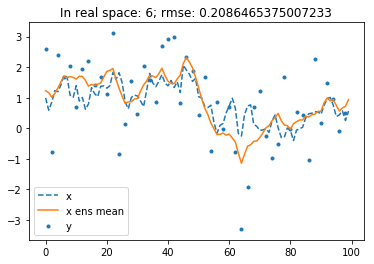

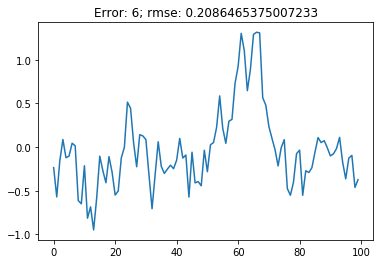

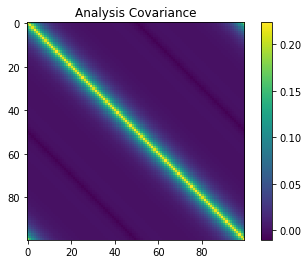

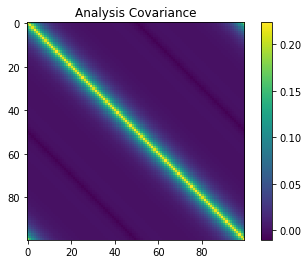

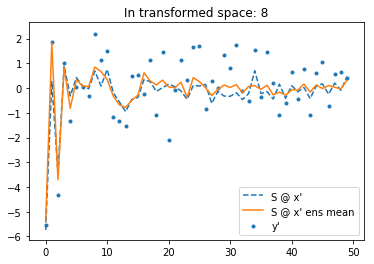

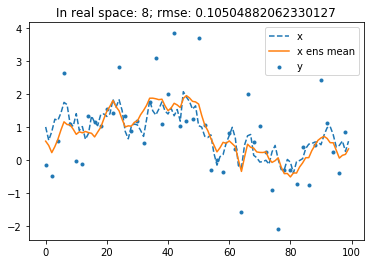

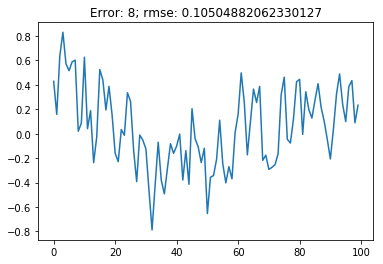

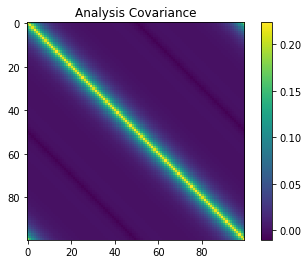

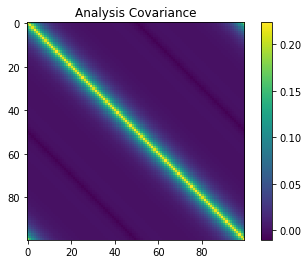

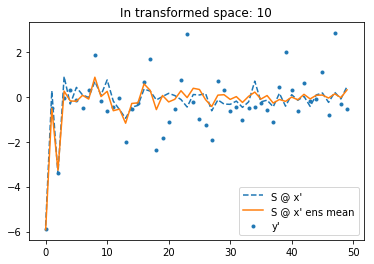

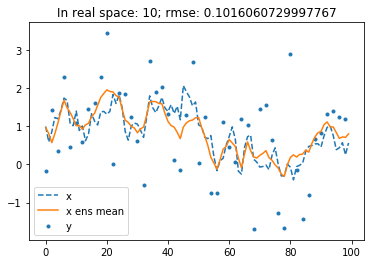

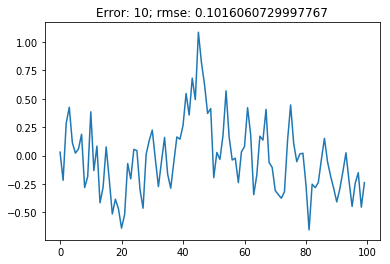

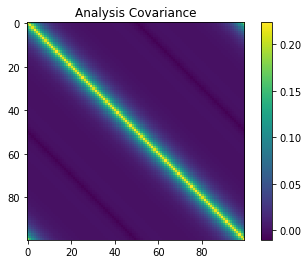

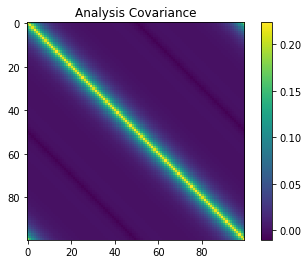

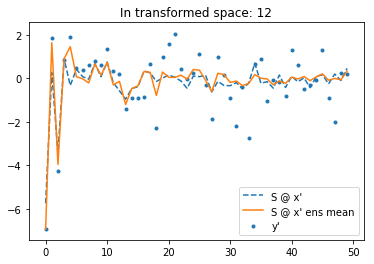

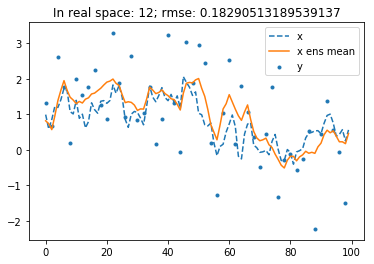

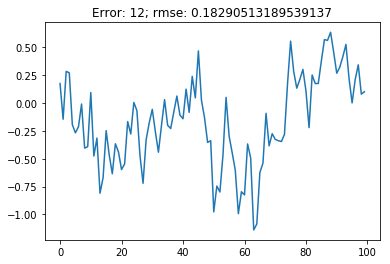

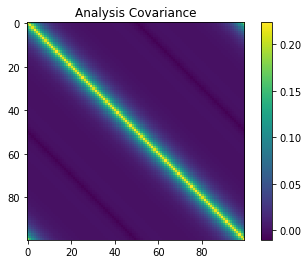

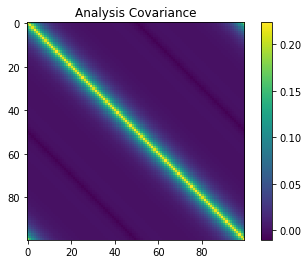

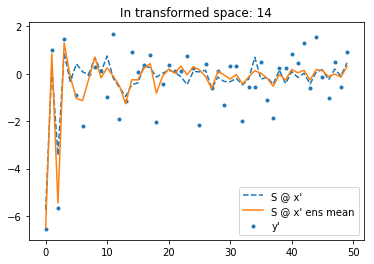

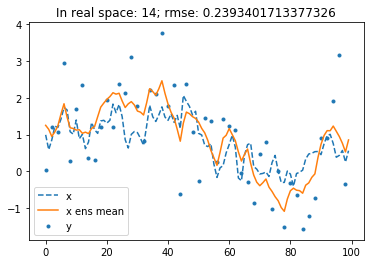

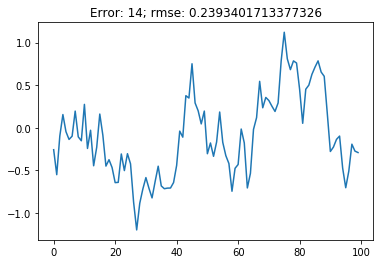

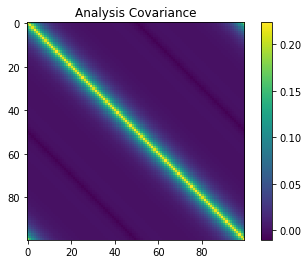

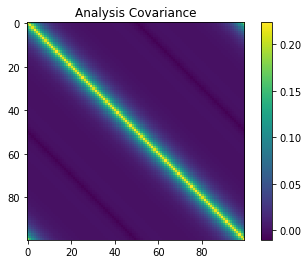

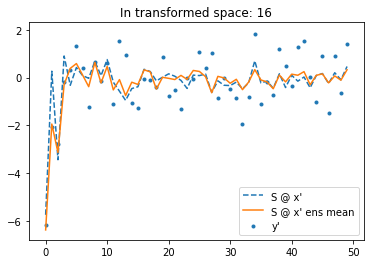

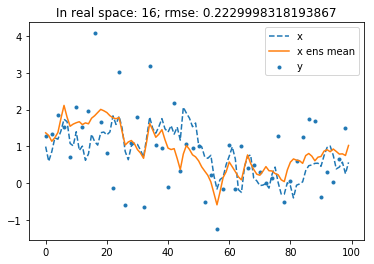

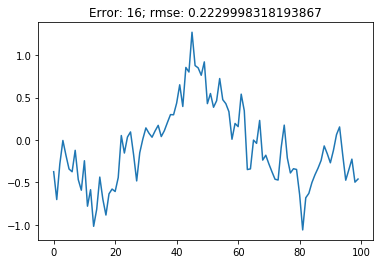

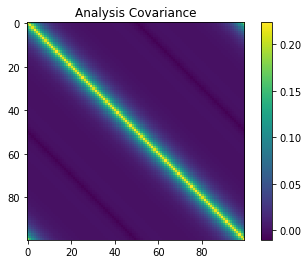

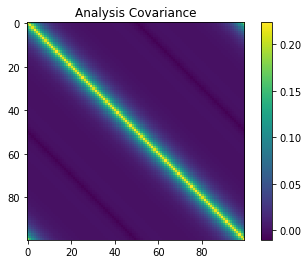

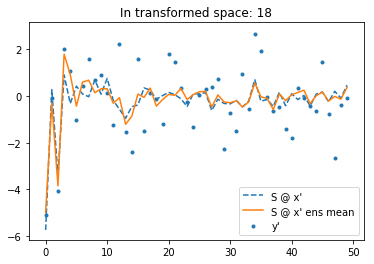

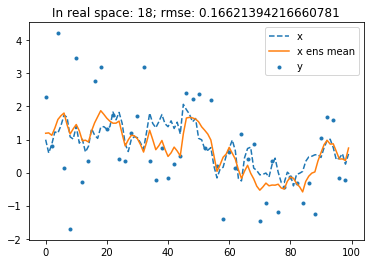

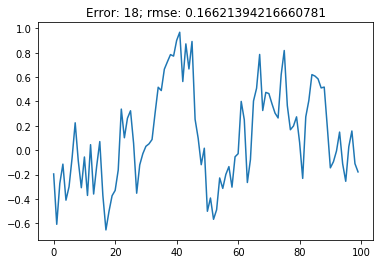

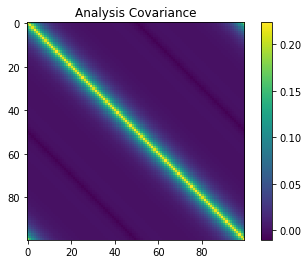

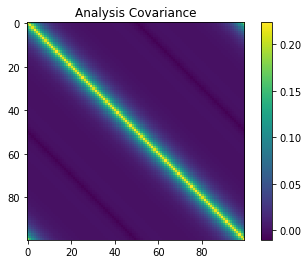

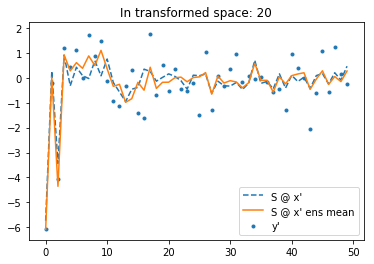

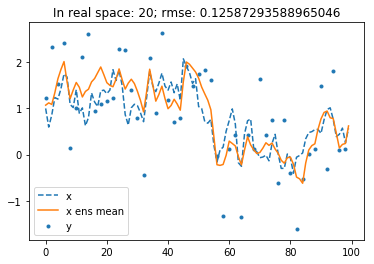

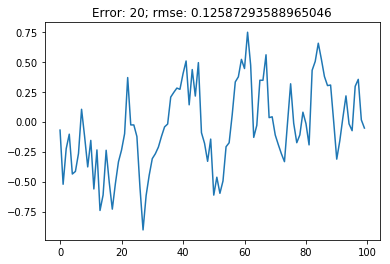

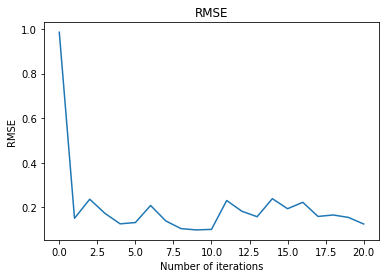

In [122]:
X_ens_kf = X_ens_p.copy()
P_sqrt_kf = P_sqrt.copy()
P_inv_sqrt_kf = P_inv_sqrt.copy()
U_kf = U.copy()
S_kf = S.copy()
VT_kf = VT.copy()

plt.figure()
plt.plot(S_kf @ VT_kf @ P_inv_sqrt_kf @ ground_truth, '--')
plt.plot(S_kf @ X_ens_kf.mean(axis=1), '-')
plt.legend(['S @ x\'', 'S @ x\' ens mean'])
plt.title('In transformed space: 0')

plt.figure()
plt.plot(ground_truth, '--')
plt.plot(P_sqrt_kf @ VT_kf.T @ X_ens_kf.mean(axis=1), '-')
plt.legend(['x', 'x ens mean'])
plt.title(f'In real space: 0; rmse: {rmse[0]}')

iterations = 20
rmse = np.ones(iterations + 1)*np.nan
error = (ground_truth
         - P_sqrt_kf @ VT_kf.T @ X_ens_kf.mean(axis=1)[:, None])
rmse[0] = (error**2).mean()

plt.figure()
plt.plot(error)
plt.title(f'Error: 0; rmse: {rmse[0]}')

for ii in range(iterations):
    mu_p = X_ens_kf.mean(axis=1)[:, None]
    Y_obs = (Y_ens_p[:, ii][:, None] 
             + R_sqrt @ np.random.randn(H.shape[0], ens_size))
    K = (S_kf.diagonal()/(1 + S_kf.diagonal()**2))[:, None]
    X_ens_kf[:y_size] = mu_p[:y_size] + K * (Y_obs - S_kf @ mu_p)
    error = (ground_truth
             - P_sqrt_kf @ VT_kf.T @ X_ens_kf.mean(axis=1)[:, None])
    rmse[ii + 1] = (error**2).mean()
    
    P_p = 1 - (S_kf.diagonal()**2/(1 + S_kf.diagonal()**2))
    P_p = np.concatenate([P_p, np.ones(dimension - y_size)])
    P_p = np.diag(P_p)
#     P_sqrt_kf, P_inv_sqrt_kf, U_kf, S_kf, VT_kf = stuff(
#         P_p, P_sqrt_kf, VT_kf)
    stuff(P_p, P_sqrt_kf, VT_kf)
    if (ii + 1) % 2 == 0 or ii ==0 :
        plt.figure()
        plt.plot(S @ VT @ P_inv_sqrt @ ground_truth, '--')
        plt.plot(S @ X_ens_kf.mean(axis=1), '-')
        plt.scatter(np.arange(dimension/2), Y_ens_p[:, ii], marker='.')
        plt.legend(['S @ x\'', 'S @ x\' ens mean', 'y\''])
        plt.title(f'In transformed space: {ii + 1}')


        plt.figure()
        plt.plot(ground_truth, '--')
        plt.plot(P_sqrt @ VT.T @ X_ens_kf.mean(axis=1), '-')
        plt.scatter(np.arange(dimension)[::2], Y_ens[:, ii], marker='.')
        plt.legend(['x', 'x ens mean', 'y'])
        plt.title(f'In real space: {ii + 1}; rmse: {rmse[ii + 1]}')
        
        plt.figure()
        plt.plot(error)
        plt.title(f'Error: {ii + 1}; rmse: {rmse[ii + 1]}')
        
plt.figure()
plt.plot(rmse)
plt.title('RMSE')
plt.xlabel('Number of iterations')
plt.ylabel('RMSE')

Text(0,0.5,'RMSE')

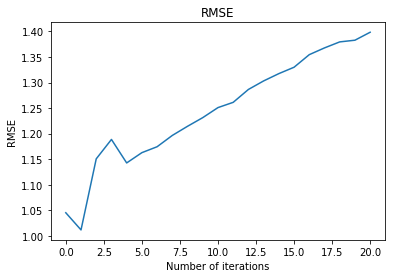

In [107]:
plt.figure()
plt.plot(rmse)
plt.title('RMSE')
plt.xlabel('Number of iterations')
plt.ylabel('RMSE')